In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.dpi"] = 150

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("TensorFlow_FILES/DATA/cancer_classification.csv")

# EDA

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


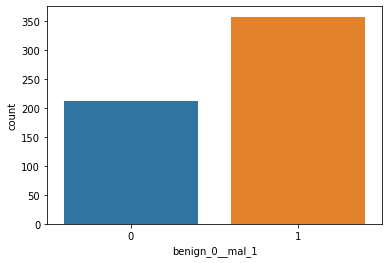

In [8]:
sns.countplot(df["benign_0__mal_1"])

In [9]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [14]:
correlations = df.corr()["benign_0__mal_1"][:-1].sort_values(ascending=False)
correlations

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0.776454
mean concave points       -0

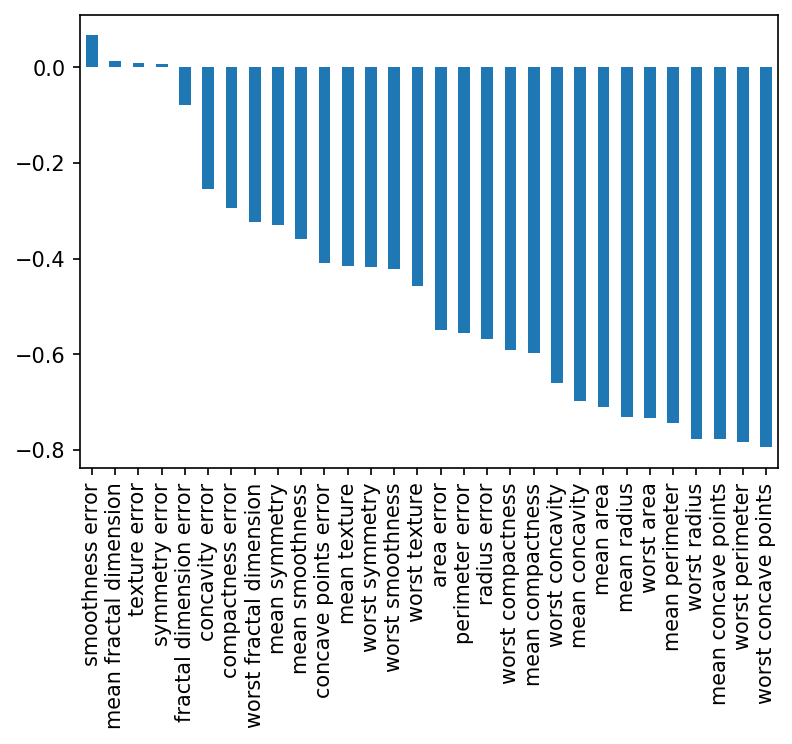

In [18]:
correlations.plot(kind="bar")

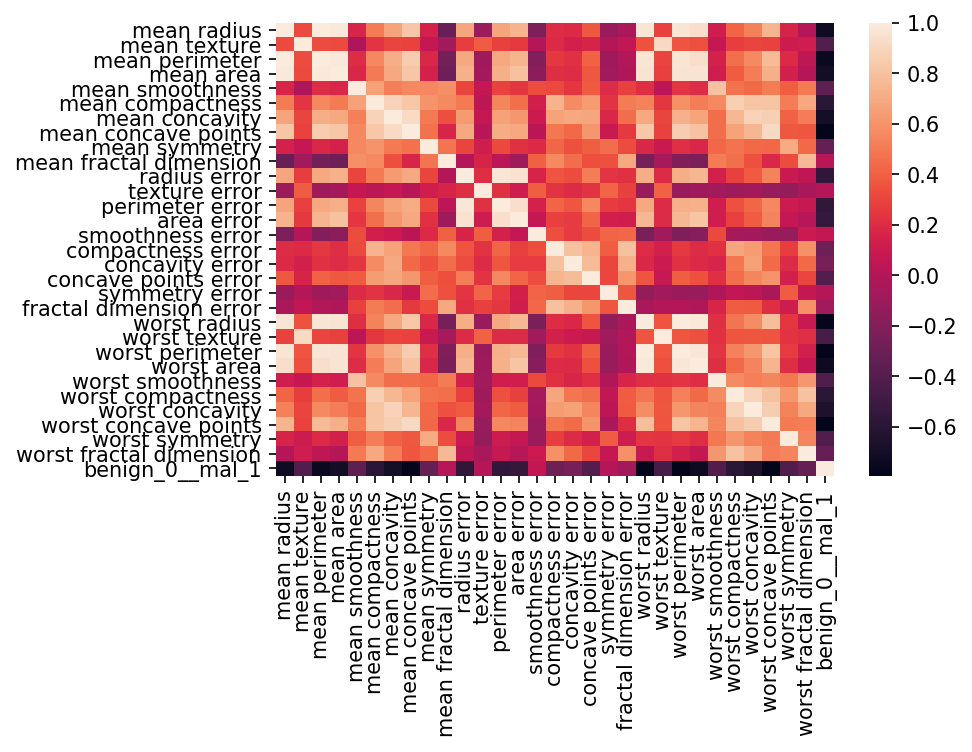

In [25]:
sns.heatmap(df.corr(), xticklabels=True, yticklabels=True)

# Split Data & Preprocessing

In [28]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df["benign_0__mal_1"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create the NN Model

In [44]:
model = Sequential()
X_train.shape

(426, 30)

In [45]:
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [46]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [47]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 536us/sample - loss: 0.6695 - val_loss: 0.6333
Epoch 2/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6248 - val_loss: 0.5953
Epoch 3/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5847 - val_loss: 0.5572
Epoch 4/600
426/426 [==============================] - 0s 70us/sample - loss: 0.5449 - val_loss: 0.5138
Epoch 5/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4968 - val_loss: 0.4645
Epoch 6/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4449 - val_loss: 0.4097
Epoch 7/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3920 - val_loss: 0.3562
Epoch 8/600
426/426 [==============================] - 0s 80us/sample - loss: 0.3472 - val_loss: 0.3147
Epoch 9/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3107 - val_loss: 0.2814
Epoch 10/600
426/

426/426 [==============================] - 0s 75us/sample - loss: 0.0536 - val_loss: 0.1178
Epoch 79/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0535 - val_loss: 0.1163
Epoch 80/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0533 - val_loss: 0.1190
Epoch 81/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0546 - val_loss: 0.1205
Epoch 82/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0580 - val_loss: 0.1140
Epoch 83/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0566 - val_loss: 0.1210
Epoch 84/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0527 - val_loss: 0.1172
Epoch 85/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0519 - val_loss: 0.1181
Epoch 86/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0518 - val_loss: 0.1208
Epoch 87/600
426/426 [==============================] - 0s 68us/samp

426/426 [==============================] - 0s 70us/sample - loss: 0.0426 - val_loss: 0.1336
Epoch 156/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0429 - val_loss: 0.1379
Epoch 157/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0427 - val_loss: 0.1357
Epoch 158/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0418 - val_loss: 0.1375
Epoch 159/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0423 - val_loss: 0.1343
Epoch 160/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0433 - val_loss: 0.1433
Epoch 161/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0431 - val_loss: 0.1418
Epoch 162/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0430 - val_loss: 0.1273
Epoch 163/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0471 - val_loss: 0.1352
Epoch 164/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 75us/sample - loss: 0.0404 - val_loss: 0.1343
Epoch 233/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0413 - val_loss: 0.1570
Epoch 234/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0359 - val_loss: 0.1432
Epoch 235/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0356 - val_loss: 0.1359
Epoch 236/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0368 - val_loss: 0.1472
Epoch 237/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0377 - val_loss: 0.1353
Epoch 238/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0375 - val_loss: 0.1538
Epoch 239/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0383 - val_loss: 0.1417
Epoch 240/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0397 - val_loss: 0.1518
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0388 - val_loss: 0.1535
Epoch 310/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0333 - val_loss: 0.1426
Epoch 311/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0349 - val_loss: 0.1668
Epoch 312/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0306 - val_loss: 0.1477
Epoch 313/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0290 - val_loss: 0.1638
Epoch 314/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0314 - val_loss: 0.1462
Epoch 315/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0285 - val_loss: 0.1483
Epoch 316/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0294 - val_loss: 0.1576
Epoch 317/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0350 - val_loss: 0.1445
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0238 - val_loss: 0.1731
Epoch 387/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0237 - val_loss: 0.1508
Epoch 388/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0223 - val_loss: 0.1624
Epoch 389/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0240 - val_loss: 0.1619
Epoch 390/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0282 - val_loss: 0.1426
Epoch 391/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0261 - val_loss: 0.1725
Epoch 392/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0238 - val_loss: 0.1490
Epoch 393/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0216 - val_loss: 0.1682
Epoch 394/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0278 - val_loss: 0.1403
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0182 - val_loss: 0.1761
Epoch 464/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0181 - val_loss: 0.1587
Epoch 465/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0175 - val_loss: 0.1693
Epoch 466/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0174 - val_loss: 0.1531
Epoch 467/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0195 - val_loss: 0.1707
Epoch 468/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0210 - val_loss: 0.1514
Epoch 469/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0210 - val_loss: 0.1651
Epoch 470/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0185 - val_loss: 0.1673
Epoch 471/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0184 - val_loss: 0.1575
Epoch 472/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 54us/sample - loss: 0.0151 - val_loss: 0.1834
Epoch 541/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0135 - val_loss: 0.1932
Epoch 542/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0159 - val_loss: 0.1822
Epoch 543/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0156 - val_loss: 0.1766
Epoch 544/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0154 - val_loss: 0.1867
Epoch 545/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0138 - val_loss: 0.1752
Epoch 546/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0162 - val_loss: 0.1747
Epoch 547/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0148 - val_loss: 0.1806
Epoch 548/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0142 - val_loss: 0.1696
Epoch 549/600
426/426 [==============================] - 0s 

# Evaluate NN Model

In [49]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.669540,0.633273
1,0.624762,0.595278
2,0.584739,0.557184
3,0.544918,0.513795
4,0.496790,0.464475


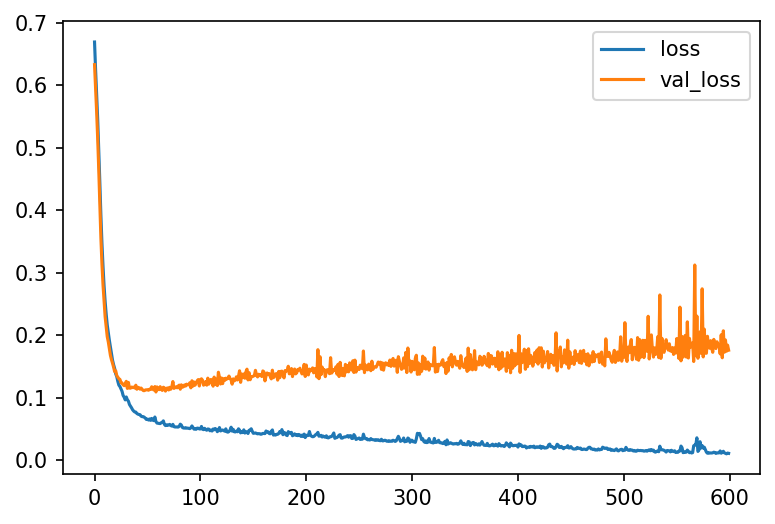

In [50]:
losses.plot()

We can see that at some epoch our validation loss begins to diverge from the training loss and start to increase. This is indicitive of **over-fitting**!

We will attempt to implement "early stopping callbacks" to try and fix this issue.

# Early Stopping Callbacks

In [51]:
model2 = Sequential()

In [52]:
model2.add(Dense(units=30, activation="relu"))
model2.add(Dense(units=15, activation="relu"))
model2.add(Dense(units=1, activation="sigmoid"))

In [53]:
model2.compile(loss="binary_crossentropy", optimizer="adam")

In [55]:
early_stop_criteria = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [56]:
model2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          callbacks=[early_stop_criteria])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 616us/sample - loss: 0.6818 - val_loss: 0.6631
Epoch 2/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6518 - val_loss: 0.6293
Epoch 3/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6178 - val_loss: 0.5900
Epoch 4/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5781 - val_loss: 0.5482
Epoch 5/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5380 - val_loss: 0.5022
Epoch 6/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4921 - val_loss: 0.4541
Epoch 7/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4465 - val_loss: 0.4052
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4004 - val_loss: 0.3604
Epoch 9/600
426/426 [==============================] - 0s 89us/sample - loss: 0.3599 - val_loss: 0.3188
Epoch 10/600
426/

426/426 [==============================] - 0s 68us/sample - loss: 0.0537 - val_loss: 0.1006
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0533 - val_loss: 0.1033
Epoch 80/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0513 - val_loss: 0.0995
Epoch 81/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0508 - val_loss: 0.1113
Epoch 82/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0530 - val_loss: 0.0992
Epoch 83/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0517 - val_loss: 0.1085
Epoch 84/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0504 - val_loss: 0.1012
Epoch 85/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0500 - val_loss: 0.1075
Epoch 86/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0499 - val_loss: 0.1009
Epoch 87/600
426/426 [==============================] - 0s 77us/samp

**Let's look at the losses**

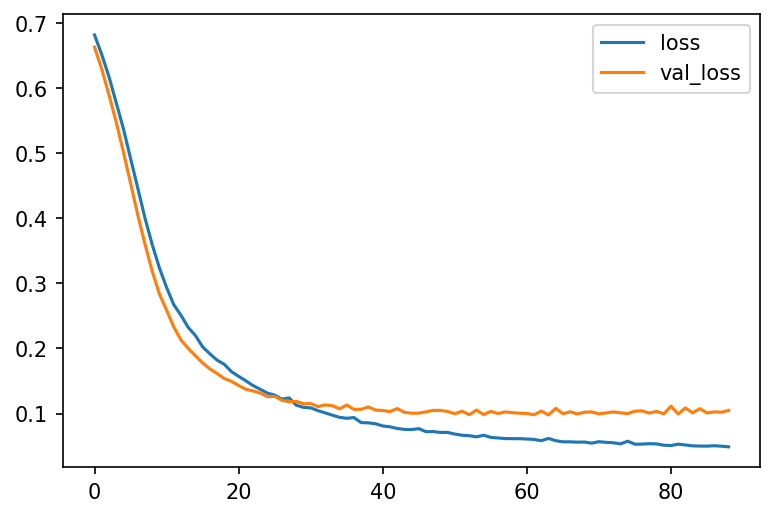

In [57]:
losses2 = pd.DataFrame(model2.history.history)
losses2.plot()

# Dropout Layers

In [59]:
model3 = Sequential()

In [60]:
model3.add(Dense(units=30, activation="relu"))
model3.add(Dropout(rate=0.5))

model3.add(Dense(units=15, activation="relu"))
model.add(Dropout(rate=0.5))

model3.add(Dense(units=1, activation="sigmoid"))

In [61]:
model3.compile(loss="binary_crossentropy", optimizer="adam")

In [62]:
model3.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop_criteria])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7132 - val_loss: 0.6660
Epoch 2/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6698 - val_loss: 0.6428
Epoch 3/600
426/426 [==============================] - 0s 98us/sample - loss: 0.6378 - val_loss: 0.6221
Epoch 4/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6236 - val_loss: 0.6034
Epoch 5/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6046 - val_loss: 0.5832
Epoch 6/600
426/426 [==============================] - 0s 96us/sample - loss: 0.5773 - val_loss: 0.5606
Epoch 7/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5714 - val_loss: 0.5364
Epoch 8/600
426/426 [==============================] - 0s 91us/sample - loss: 0.5479 - val_loss: 0.5135
Epoch 9/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5288 - val_loss: 0.4914
Epoch 10/600
426/42

426/426 [==============================] - 0s 83us/sample - loss: 0.0992 - val_loss: 0.0957
Epoch 79/600
426/426 [==============================] - 0s 106us/sample - loss: 0.1026 - val_loss: 0.0957
Epoch 80/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0927 - val_loss: 0.0979
Epoch 81/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0823 - val_loss: 0.0996
Epoch 82/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0939 - val_loss: 0.0943
Epoch 83/600
426/426 [==============================] - 0s 102us/sample - loss: 0.1074 - val_loss: 0.0953
Epoch 84/600
426/426 [==============================] - 0s 89us/sample - loss: 0.1047 - val_loss: 0.1046
Epoch 85/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0950 - val_loss: 0.0954
Epoch 86/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0984 - val_loss: 0.0955
Epoch 87/600
426/426 [==============================] - 0s 101us/s

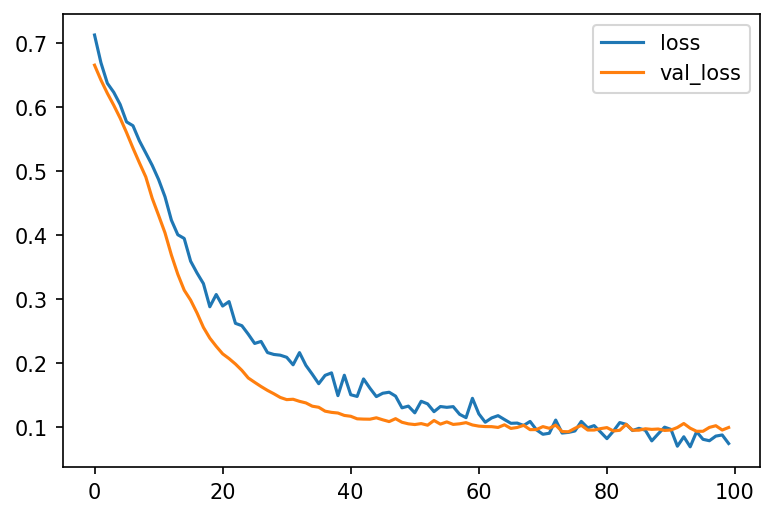

In [63]:
losses3 = pd.DataFrame(model3.history.history)
losses3.plot()

# Concluding Evaluation

In [64]:
predictions = model.predict_classes(X_test)
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [66]:
print(confusion_matrix(predictions, y_test))
print("\n\n\n")
print(classification_report(predictions, y_test))

[[54  5]
 [ 1 83]]




              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.94      0.99      0.97        84

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In this case, because our target class was relatively balanced (cf. count plot above), we are able to interpret our accuracy of 0.96 as being a valid representative metric of our model.